In [1]:
import pandas as pd
import numpy as np

import os
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from Helper.data_preprocess import prepare_data

In [2]:
path_data = 'Dataset/laptop_raw_data.csv'
df = pd.read_csv(path_data)
print(f'Before Dataset preprocessing \n\n{df}')

Before Dataset preprocessing 

      Unnamed: 0 Company            TypeName  Inches  \
0              0   Apple           Ultrabook    13.3   
1              1   Apple           Ultrabook    13.3   
2              2      HP            Notebook    15.6   
3              3   Apple           Ultrabook    15.4   
4              4   Apple           Ultrabook    13.3   
...          ...     ...                 ...     ...   
1298        1298  Lenovo  2 in 1 Convertible    14.0   
1299        1299  Lenovo  2 in 1 Convertible    13.3   
1300        1300  Lenovo            Notebook    14.0   
1301        1301      HP            Notebook    15.6   
1302        1302    Asus            Notebook    15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Displ

In [3]:
X,y = prepare_data(path_data)
print(f'After Dataset preprocessing \n\n')
#data_df['text']
X


After Dataset preprocessing 




,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37
1,Apple,Ultrabook,13.3,1440x900,No,Intel Core i5,8,0,0,Intel,No,Mac,1.34
2,HP,Notebook,15.6,1920x1080,No,Intel Core i5,8,256,0,Intel,No,Others/No OS/Linux,1.86
3,Apple,Ultrabook,15.4,2880x1800,Yes,Intel Core i7,16,512,0,AMD,No,Mac,1.83
4,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,256,0,Intel,No,Mac,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,Yes,Intel Core i7,4,128,0,Intel,Yes,Windows,1.80
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,Yes,Intel Core i7,16,512,0,Intel,Yes,Windows,1.30
1300,Lenovo,Notebook,14.0,1366x768,No,Other Intel Processor,2,0,0,Intel,No,Windows,1.50
1301,HP,Notebook,15.6,1366x768,No,Intel Core i7,6,0,1000,AMD,No,Windows,2.19


In [4]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: price, Length: 1303, dtype: float64

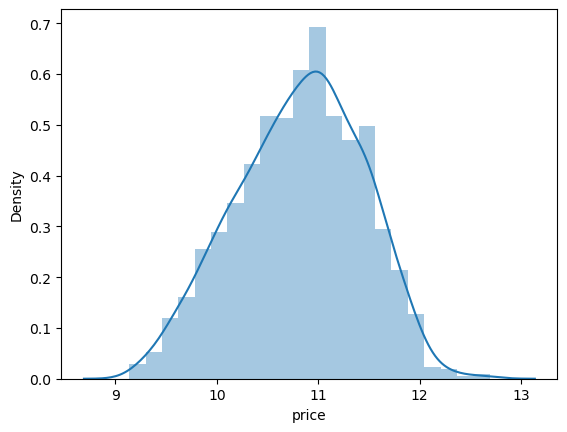

In [5]:
import Helper.ploting_data as pt
dist_plotted = pt.dist_plot(y)
plt.show()

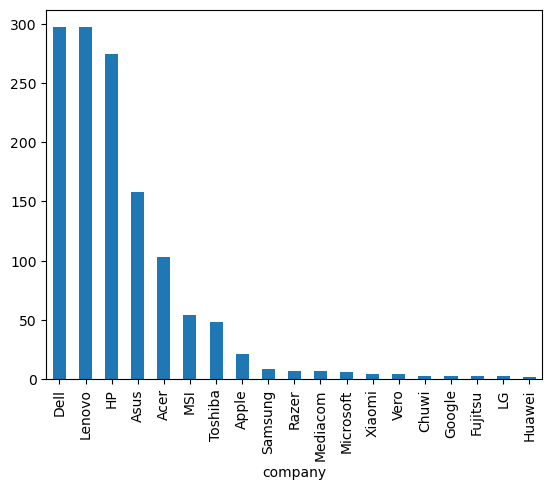

In [6]:
batr = pt.bar_plot(X)
plt.show()

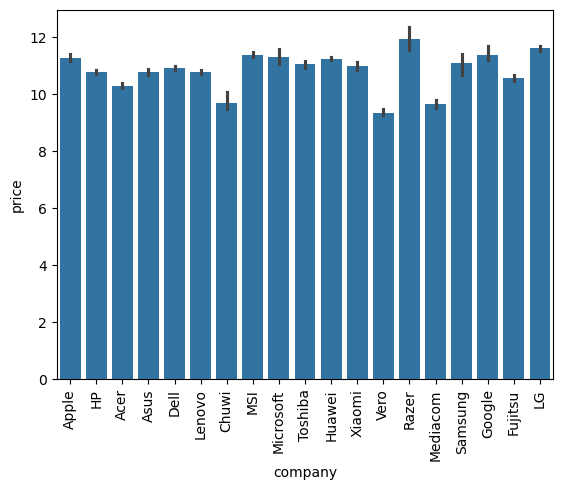

In [7]:
pt.bar_plot_2(X,y)
plt.show()

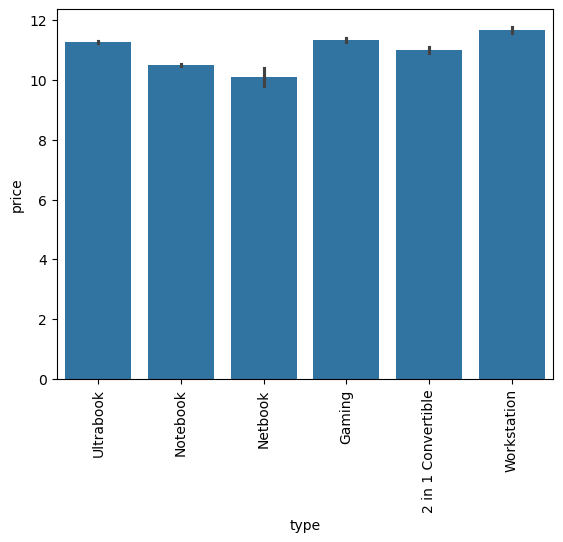

In [8]:
pt.bar_plot_3(X,y)
plt.show()

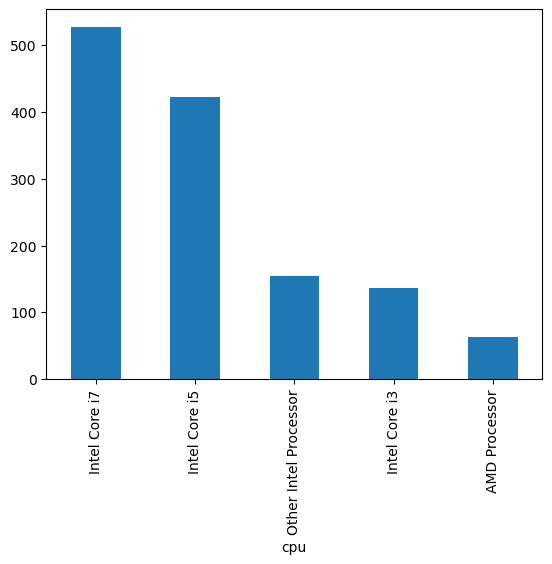

In [9]:
pt.bar_plot_4(X)
plt.show()

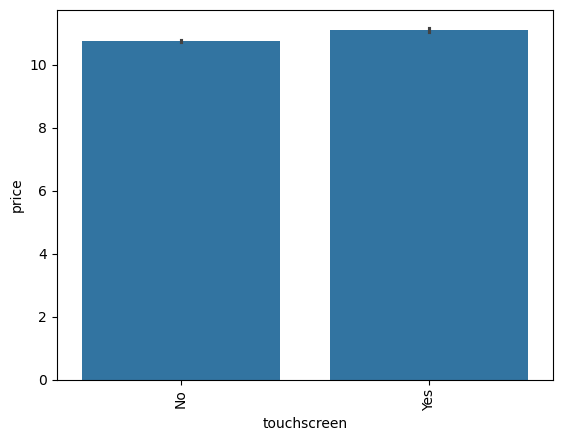

In [10]:
pt.bar_plot_5(X,y)
plt.show()

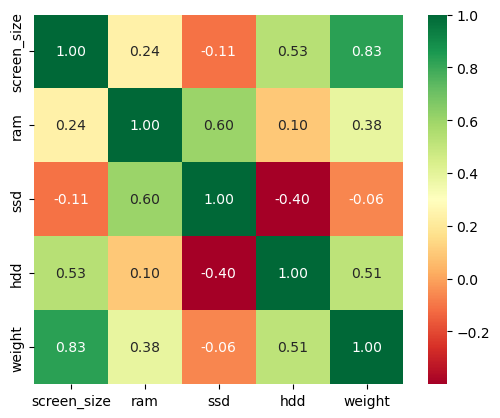

In [11]:
pt.heatmap_plot(X)
plt.show()

In [12]:
X

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37
1,Apple,Ultrabook,13.3,1440x900,No,Intel Core i5,8,0,0,Intel,No,Mac,1.34
2,HP,Notebook,15.6,1920x1080,No,Intel Core i5,8,256,0,Intel,No,Others/No OS/Linux,1.86
3,Apple,Ultrabook,15.4,2880x1800,Yes,Intel Core i7,16,512,0,AMD,No,Mac,1.83
4,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,256,0,Intel,No,Mac,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,Yes,Intel Core i7,4,128,0,Intel,Yes,Windows,1.80
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,Yes,Intel Core i7,16,512,0,Intel,Yes,Windows,1.30
1300,Lenovo,Notebook,14.0,1366x768,No,Other Intel Processor,2,0,0,Intel,No,Windows,1.50
1301,HP,Notebook,15.6,1366x768,No,Intel Core i7,6,0,1000,AMD,No,Windows,2.19


In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((1107, 13), (196, 13), (1107,), (196,))

In [14]:
import Helper.model_training as mt

## LinearRegression model

In [15]:
model = mt.linear_reg(X_train,X_test,y_train,y_test)

MAE: 0.19709809918543172
MSE: 0.06483419827396344
RMSE: 0.2546256041209592
R² Score: 0.8243651693486913


## Lasso Regression model

In [16]:
 model_2= mt.Lasso_reg(X_train,X_test,y_train,y_test)

MAE: 0.3319122157151802
MSE: 0.17594441424447232
RMSE: 0.4194572853634471
R² Score: 0.5233693294194488


## Ridge Regression model

In [18]:
model_3 =  mt.Ridge_reg(X_train,X_test,y_train,y_test)

MAE: 0.20118611040206344
MSE: 0.07003672199923425
RMSE: 0.2646445200627329
R² Score: 0.81027161382131
